In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

In [3]:
def evaluative_classifier(w,b,x):
    if (np.dot(w,x)+b) > 0:
        return 1
    elif (np.dot(w,x)+b) <= 0:
        return -1
    else:
        return 0

In [4]:
def train_perception(x,y,n_iters=100):
    n,d = x.shape
    w = np.zeros((d,))
    b = 0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            if (evaluative_classifier(w,b,x[j,:]) != y[j]):
                w = w + y[j] * x[j,:]
                b = b + y[j]
                done = False
        iters = iters + 1
        if (iters > n_iters):
            done = True
            converged = False
    if converged:
        print("Perceptron algorithm: iterations until covergence: ", iters)
    else:
        print("Perceptron algorithm: did not converge within the specified number of iterations")
    return w,b,converged

In [14]:
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    x = data[:,0:2]
    y = data[:,2]
    
    w,b,converged = train_perception(x,y,100)
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    
    plt.plot(x[(y==1),0],x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    

    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,grid_spacing), 
                              np.arange(x2min,x2max, grid_spacing))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        Z = np.array([evaluative_classifier(w,b,pt) for pt in grid])
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
        
    plt.show()

Perceptron algorithm: iterations until covergence:  15


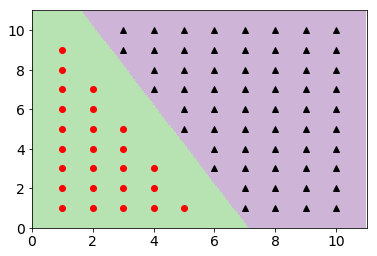

In [15]:
run_perceptron('./perceptron_at_work/data_1.txt')

Perceptron algorithm: did not converge within the specified number of iterations


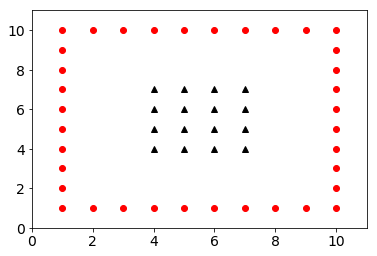

In [16]:
run_perceptron('./perceptron_at_work/data_2.txt')

In [67]:
# generate 2 data points with coord in range[-1,1]
np.random.seed(None)
testx = np.random.uniform(low=-1.0, high=1.0, size=4)
testx = testx.reshape(2,2)
testy = np.array([-1,1]).reshape(2,1)
test = np.concatenate((testx,testy), axis=1)
print(test)
np.savetxt('./test_dat.txt',test)

[[ 0.76478954  0.95159223 -1.        ]
 [-0.87780708  0.66882574  1.        ]]


Perceptron algorithm: iterations until covergence:  2


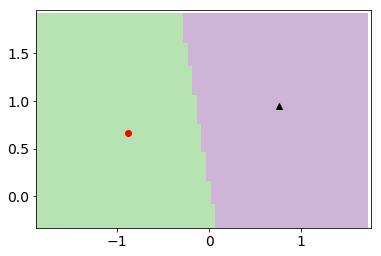

In [68]:
run_perceptron('./test_dat.txt')